<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1Bu2buwnLEzZcMTSDBh2VGq98YcWgFvxQ?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Setup

Special Thanks to ageron for his <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/03_classification.ipynb#scrollTo=tg95T48rbSNX"> code </a>

In [1]:
import sys
import sklearn
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Scikit-Learn

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Saving the data to csv for making sense about the data

In [3]:
import pandas as pd

def sklearn_to_frame(datas):
  data_frame = pd.DataFrame(datas.data, columns=datas.feature_names)
  data_frame['target'] = datas.target
  return data_frame

mnist_data = sklearn_to_frame(mnist)
mnist_data.to_csv("mnist_dataset.csv")

In [4]:
# checking mnist keys
print(mnist.keys())
x, y = mnist.data, mnist.target

#analysing data
print(
f'''
x shape: {x.shape},
y shape: {y.shape},
''')

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

x shape: (70000, 784),
y shape: (70000,),



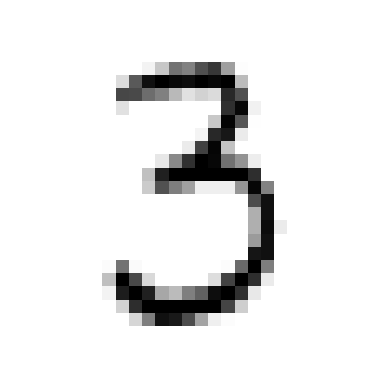

the label for that image is 3


In [5]:
#looking at the image:

def plot_digits(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

imageNumber = 50 #Choose number from 0 - 70,000
some_digit = x[imageNumber]
plot_digits(some_digit)
plt.show()
print(f"the label for that image is {y[imageNumber]}")

In [6]:
x_train, y_train, x_test, y_test = x[0:60000], y[0:60000], x[60000:], y[60000:]

In [7]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

sgd_clf = SGDClassifier(random_state=52)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=52)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
cm

'''
remember the output is
[[true negative   false positive]
 [false negative  true positive]]
'''

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"precision score is {precision_score(y_train_5, y_train_pred)}, recall score is {recall_score(y_train_5, y_train_pred)}")
print(f"f1 score is {f1_score(y_train_5, y_train_pred)}")

'''
f1 score is the harmonic mean of precision_score and recall_score
'''

In [ ]:
from sklearn.metrics import roc_curve
y_score = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")
fpr, tpr, threshold = roc_curve(y_train_5, y_score)

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.grid()
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 52)

In [ ]:
y_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")
y_forest[:2]

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores_forest = y_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

In [ ]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [ ]:
y_train_pred_forest = y_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
precision_score(y_train_5, y_train_pred_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

## now we will test the multiclass classification

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state = 42)
svm_clf.fit(x_train[:2000], y_train[:2000])

In [ ]:
svm_clf.predict([some_digit])

In [ ]:
all_digit_classifier = svm_clf.decision_function([some_digit])
all_digit_classifier.round(2)

In [ ]:
all_digit_classifier.argmax()

In [ ]:
svm_clf.classes_

In [ ]:
svm_clf.classes_[all_digit_classifier.argmax()]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000], y_train[:2000])

In [ ]:
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

In [10]:
sgd_clf = SGDClassifier(random_state=42, verbose=True)
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

Streaming output truncated to the last 5000 lines.
-- Epoch 99
Norm: 220.05, NNZs: 678, Bias: -231.400716, T: 5940000, Avg. loss: 154.567974
Total training time: 8.39 seconds.
-- Epoch 100
Norm: 218.89, NNZs: 680, Bias: -231.538081, T: 6000000, Avg. loss: 151.896873
Total training time: 8.47 seconds.
-- Epoch 101
Norm: 215.81, NNZs: 680, Bias: -231.703941, T: 6060000, Avg. loss: 150.788092
Total training time: 8.55 seconds.
-- Epoch 102
Norm: 215.14, NNZs: 680, Bias: -231.845110, T: 6120000, Avg. loss: 148.945631
Total training time: 8.63 seconds.
-- Epoch 103
Norm: 214.00, NNZs: 680, Bias: -231.996395, T: 6180000, Avg. loss: 148.885800
Total training time: 8.71 seconds.
-- Epoch 104
Norm: 211.57, NNZs: 680, Bias: -232.176707, T: 6240000, Avg. loss: 146.514154
Total training time: 8.80 seconds.
-- Epoch 105
Norm: 210.93, NNZs: 680, Bias: -232.345722, T: 6300000, Avg. loss: 144.940033
Total training time: 8.88 seconds.
-- Epoch 106
Norm: 210.37, NNZs: 680, Bias: -232.516328, T: 6360000,

array(['3'], dtype='<U1')

In [11]:
sgd_clf.decision_function([some_digit]).round(2)

array([[-19584.83, -18944.92,  -7919.67,   6039.69,  -9556.94,  -1495.61,
        -13482.87,  -9660.78,  -2989.18, -12452.4 ]])

In [12]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

Streaming output truncated to the last 5000 lines.
-- Epoch 64
Norm: 466.33, NNZs: 675, Bias: -452.458706, T: 2560000, Avg. loss: 580.893245
Total training time: 3.64 seconds.
-- Epoch 65
Norm: 459.69, NNZs: 675, Bias: -453.163963, T: 2600000, Avg. loss: 567.295326
Total training time: 3.70 seconds.
-- Epoch 66
Norm: 454.17, NNZs: 675, Bias: -453.884830, T: 2640000, Avg. loss: 570.498981
Total training time: 3.77 seconds.
-- Epoch 67
Norm: 451.53, NNZs: 675, Bias: -454.572505, T: 2680000, Avg. loss: 551.819673
Total training time: 3.83 seconds.
-- Epoch 68
Norm: 446.57, NNZs: 675, Bias: -455.324021, T: 2720000, Avg. loss: 555.673288
Total training time: 3.89 seconds.
-- Epoch 69
Norm: 440.06, NNZs: 675, Bias: -455.991571, T: 2760000, Avg. loss: 539.973082
Total training time: 3.95 seconds.
-- Epoch 70
Norm: 437.00, NNZs: 675, Bias: -456.667465, T: 2800000, Avg. loss: 535.937787
Total training time: 4.02 seconds.
-- Epoch 71
Norm: 433.46, NNZs: 675, Bias: -457.355314, T: 2840000, Avg. l

array([0.87365, 0.85835, 0.8689 ])

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

Streaming output truncated to the last 5000 lines.
Total training time: 9.01 seconds.
-- Epoch 166
Norm: 202.29, NNZs: 717, Bias: -1022.438830, T: 6640000, Avg. loss: 1.974862
Total training time: 9.08 seconds.
-- Epoch 167
Norm: 202.20, NNZs: 717, Bias: -1022.101006, T: 6680000, Avg. loss: 1.974710
Total training time: 9.14 seconds.
-- Epoch 168
Norm: 202.17, NNZs: 717, Bias: -1021.754738, T: 6720000, Avg. loss: 1.973801
Total training time: 9.21 seconds.
-- Epoch 169
Norm: 202.10, NNZs: 717, Bias: -1021.418009, T: 6760000, Avg. loss: 1.972924
Total training time: 9.28 seconds.
-- Epoch 170
Norm: 202.08, NNZs: 717, Bias: -1021.072963, T: 6800000, Avg. loss: 1.972811
Total training time: 9.34 seconds.
Convergence after 170 epochs took 9.34 seconds
-- Epoch 1
Norm: 295.49, NNZs: 717, Bias: -1387.437042, T: 40000, Avg. loss: 16.044116
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 264.23, NNZs: 717, Bias: -1341.502584, T: 80000, Avg. loss: 4.253540
Total training time: 0.13 seconds.

array([0.8983, 0.891 , 0.9018])